<img src="C:\Users\janic\Desktop\Final_project_template\img\backdrop-wh.png" alt="Drawing" style="width: 300px;">

<div style="display: block; width: 100%; height: 100px;"> </div>

<p style="float: left;">
    <span style="font-weight: bold; font-size: 20px;">
        DIGHUM160 - Critical Digital Humanities 
        <br />
        Instructor: Tom van Nuenen<br />
        Final Project
    </span>
</p>

**Project title:** ```Exploring Retail Workers' Experiences and Languague Biases in r/TalesFromRetail```

**Student name:** ```Janice Kim```
                  ```3036772308```

Word limit: Between 2500 and 3000 words (excluding code cells, outputs, and references).

In [2]:
# set up your environment

import pandas as pd
import json
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud
from IPython.display import display, HTML
import numpy as np
import pickle
from gensim.models import Word2Vec
import multiprocessing
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import bokeh

# < import other packages here >

## Introduction
<div style="text-align:center;">
<img src="img/reddit_logo.png" alt="Reddit Logo" style="width: 200px; margin:0 auto;">
</div> 

<p>
Reddit is an online social platform where millions of people post, vote, and comment on communities of their interest. As of 2022, there are more than 100,000 active communities, or subreddits, with over 13 billion posts and comments on Reddit. Communities on Reddit are referred to as subreddits and follow the format: "r/[nameofsubreddit]."
</p> 
<p>
The community I've chosen is r/TalesfromRetail. TalesfromRetail is a subreddit of members who currently work in the retail industry, customers, and management themselves. Retail employees from various parts of the world come together to exchange stories about their day-to-day experiences in brick and mortar retail (TalesFromRetail). Since its creation on November 9, 2011, it has an attracted 1.1 million members. According to the subreddit's rules, posts must be a story about a single incident or experience from their workplace using only narrative, action, and dialogue. Rant posts, text message conversations, and questions for advice are not allowed. Anonymity is crucial, meaning that personal information, hints, and fake names are prohibited. Guessing business names in the comments will result in a ban from the subreddit (TalesFromRetail).
</p>
<p>
I selected this subreddit due to my short experience in retail during my high school summer and my freshman year at university. Not every workday was tumultuous, but there were a few negative incidents that I've experienced at work. Some of these incidents were due to management, and on some days, it involved difficult customers. I believe I can sympathize with some of the retail workers on the subreddit. If I had known about the subreddit earlier, I probably would have also posted stories about my difficult encounter at work.
Due to my personal connection to the topic and understanding of the challenges faced by those in the retail industry, I am interested in uncovering and analyzing the experiences and stories shared by retail workers in r/TalesFromRetail. In researching the subreddit's content, I intend to find out what experiences, challenges, and interactions retail workers have posted.
</p>
<p>
I believe this subreddit allows retail workers to de-stress and relate to the experiences shared by other workers. Retail workers are crucial to both the company and the customers, as they are on the front lines, providing assistance and support that contributes to a positive experience for the customers.
 This sentiment can be seen expressed in the comments of the subreddit as shown in the screenshot:
 </p>
 <img src="img/ss_1.png" alt="screenshot_comments" style= "max-width:50%; display: inline-block; vertical-align:middle;">
 <p>
 In the screenshot, the post is celebrating the subreddit's 10th anniversary. The community members share their sentiments about the subreddit, with many expressing gratitude towards the community.One individual mentions that despite not currently working in a retail store, they have gained a better understanding of the experiences faced by workers through their prespective as a customer. A retail worker notes that this community has been a source of support during challenging times on the job.
 </p>
<p>
Using my dataset, I aim to address the following research questions: What are the dominant themes and content of posts in r/TalesFromRetail, and how do language biases show up within this content?
</p>
<p>
It’s important to investigate the dominant themes and content of the subreddit to have a deeper understanding of the retail industry. My research can bring awareness to what the workers experience from day to day. Additionally, analyzing language biases within the content can also bring attention to the subreddit’s culture, or rather the broader societal norms.
</p>


## Analysis

<p>
Before I begin my analysis, I would like to discuss a bit about the language used in the subreddit. It is important to look into this because it can offer insights into the culture, attitudes, and perceptions of the members of the r/TalesFromRetail subreddit. Moreover, it can assist in identifying potential language biases that might be present in the content. The language used in r/TalesFromRetail resembles a friend sharing a story or recounting an event from their work experience. It maintains a casual tone, occasionally incorporating explicit language. The posters and commentators seem to engage in a conversational-like relationship, often sharing their own similar experiences or responding to the original poster's encounters.
For example:
</p>
<img src="img/ss_2.png" alt= "relationship and language of tfr">

<p>In the provided screenshot, we can see an interaction between the poster and the commentor. The post is presented in a narrative format. In both the post and comments, there is no use of slang or overly informal language. The exchange appears to resemble a genuine conversation between two individuals, with the poster frequently responding to comments. The commentor conveys a sense of sadness regarding a customer behavior. Additionally, the poster mentions that this is not their first encounter with such an experience, indicating that they have other similar stories to share apart from the one mentioned.
</p>

### The data
\< load the data \>

In [3]:
# Add as many code cells as you need
# use plenty of comments to explain what you do. Comments do not count towards the word limit.
# In the narrative parts, you may refer to code cells to illustrate your points

In [4]:
# load r/tfr csv
TFR_df = pd.read_csv('data/tfr_pp.csv')

TFR_df.sample(5)

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class,pp_text
2212,67896047,t3_14f8xb,1354849883,0,[deleted],"Had my first ""nasty"" customer today. Seasoned ...",What are some things that help you deal with r...,10,NaN,7149,16,NaN,NaN,things help deal rude obnoxious customers talk...
9266,174725594,t3_2w0z4q,1424048202,0,Mr_A,"""You ARE the same person I spoke to literally ...",During a rare quiet moment in my own departmen...,501,NaN,3341,62,Medium,medium,rare quiet moment department decided bit walk ...
9757,179334374,t3_2yrrae,1426142827,0,[deleted],My first customer complaint,"Hello TFR, first time poster medium time lurke...",0,NaN,1308,5,Short,short,hello_tfr time_poster medium time_lurker funny...
23128,432680905,t3_75luq1,1507686114,0,Forks_In_Toasters_,The Story of the Clueless Phone Lady,So I work at a national chain of craft stores ...,183,NaN,2911,21,Long,long,work national_chain craft stores person store ...
13695,228984466,t3_3sbxjm,1447193857,0,MojaveMilkman,"""The sugar falls off when I do this, it isn't ...","I work in a donut shop. Today, a lady came in ...",191,NaN,2195,16,Medium,medium,work donut shop today lady came ordered dozen ...


### WordCloud
To gain a better understanding of our dataset, I created a Word Cloud. A Word Cloud can identify common themes and  the most mentioned words in the posts.

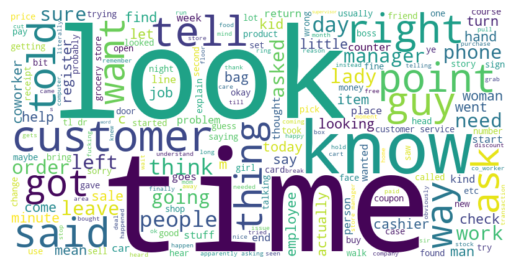

In [5]:
#Load the data
TFR_df= pd.read_csv('data/tfr_pp.csv')
# Getting text data from the Preprocessed text column 
TFR_df['pp_text'].fillna('', inplace=True)
text_data = ' '.join(TFR_df['pp_text'])
#Create WordCloud
wordcloud= WordCloud (width=800, height=400, background_color='white').generate(text_data)
#Display the WordCloud with matplotlib
#plotting the wordcloud
plt.imshow(wordcloud,interpolation="bilinear")
#removing plot axes
plt.axis("off")
#save the image
plt.savefig('TFR_wc.png')
                                                                                                                # (Garla,A. , 2021)

<p>
To create this Word Cloud, I worked with a preprocessed text dataset that we created in week 1. Preprocessed data provides a clearer analysis by removing irrelevant words like stop words. The WordCloud visualization highlights frequently mentioned terms within the subreddit. The size and boldness of the words directly correlate with their frequency. It's interesting to observe that words like "time","know", and “look” hold substantial prominence in the subreddit's content. Additionally, "tell" and "said'' appear to be frequently utilized due to the narrative and conversational format of the posts. This observation diverges from my initial expectations, which were centered around terms like "complain" or "rude." This insight emphasizes the importance of analyzing the data rather than relying solely on preconceived notions.
</p>

### Topic Modeling
<p>
For topic modeling, I was able to generate a PyLDAvis visualization following the topic modeling lesson in week 3. PyLDAvis is a valuable tool to interactively explore the topics and their relationships within the dataset. Using this tool, it helped me gain insights to the main themes or topics within r/talesfromretail.
</p>


In [6]:
#Direct File path
file_path = r'C:\Users\janic\Desktop\Final_project_template\data\tfr_lda_visualization.html'
#open the save HTML visualization
with open(file_path, 'r') as f:
    lda_html = f.read()

#Display the HTML save
display(HTML(lda_html))



<p>To create the visualization, I printed the coherence scores of each model in the model_list alongside the corresponding number of topics. I chose model_list [6] as it had the highest coherence value of 0.46 and comprised 18 topics. While these methods are essentially heuristics, I compared each model and concluded that this particular model appeared more favorable in comparison to the others.
</p>
<p>
Based on the visualization, I can observe the top-30 most salient terms, which represent the overall keywords of the entire subreddit. These terms are the most significant and commonly used words within the community. Notably, the terms "store" and "customer" have the highest term frequency. As a result, topics related to stores and customers are likely to be prevalent throughout the subreddit. Therefore, I anticipate discovering discussions and stories about these topics more frequently than others within the community.
</p>


### Language Biases
To uncover language biases within my data, I referred back to our Word Embedding lesson from week 4. I chose to use submission data for my project because, although I won't have as many individual contributors like I assume for the comment dataset, the posts are structured in a more descriptive manner compared to comments. This narrative format allows for a deeper exploration of biases within the posts themselves. Unlike comments that often react to the post, the submissions in this subreddit tend to provide personal experiences, making them more suitable for uncovering biases.

<img src='img/ss_3.png' alt= "woman similar word list">
<img src='img/ss_4.png' alt= "guy similar word list">
<img src='img/ss_5.png' alt= "disabled similar word list">

<p>
In our Word Embedding lesson, we were able to extract word similarities from our trained word embeddings model. However, for my analysis, I chose to provide screenshots of this process instead of training a new Word2Vec model in my Jupyter notebook. I selected three specific words for extracting similar terms: "woman," "guy," and "disabled.”
</p>
<p>
For the word "guy," I chose it over terms like "male" or "man" because it yielded "female" and "woman" as similar terms, which wasn't exactly helpful in my analysis. When examining the term "woman," I noticed numerous age-related descriptors such as "60ish," "mid-40s," "late_20s_early_30s," along with verbs like "harasses" appearing as similar terms. Surprisingly, for the term "guy," the similar terms included action-related descriptors like "ahole," "druggie," and "tweaker," which is quite intriguing.
</p>
<p>
For the term "disabled," the similar words seemed to focus on structural aspects such as "parking_spots" and support tools like "wheelchairs," rather than directly addressing the experiences of disabled individuals themselves. This observation was unexpected; I initially anticipated words such as "mentally disabled” to appear but the resulting similar words had more to do with creating or perhaps the lack of accessible environments.
</p>
<p>
The process of exploring word similarities through Word Embedding shed light on some subtle yet thought-provoking aspects of language use in the r/TalesFromRetail subreddit.
</p>


In [10]:
from gensim.models import Word2Vec
model = Word2Vec.load('data/tfr_submissions_embeddings.emb')

In [11]:
# Import function to calculate biased words
from utils import calculate_biased_words


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\janic\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\janic\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
target1 = ['sister','female','woman','girl','daughter','she','hers','her']
target2 = ['brother', 'male', 'man', 'boy', 'son', 'he', 'his', 'him']


In [13]:
#calculate biased words
[b1, b2,] = calculate_biased_words(model, target1, target2, 4)

In [14]:
#printing female biases
print('Biased words towards target set 1')
print([word for word in b1.keys()])

Biased words towards target set 1
['clothes', 'clothing', 'mall', 'dollar', 'bunch', 'gift', 'baby', 'purse', 'hang', 'dress', 'horrible', 'multiple', 'tiny', 'level', 'furniture', 'jewelry', 'insisted', 'visit', 'ton', 'makeup', 'claims', 'pl', 'grandma', 'handful', 'thrift', 'carrier', 'gifts', 'amounts', 'ordinary', 'rep', 'bras', 'insisting', 'cosmetics', 'designer', 'significant', 'boutique', 'notorious', 'overwhelmed', 'registry', 'receptionist', 'alterations']


Upon analyzing the identified biases, it becomes apparent that biases related to females encompass numerous materialistic general items, including "clothes," "jewelry," and "purse." Additionally, the biases extend to actions commonly associated with descriptions of rude or demanding customers, such as "horrible," "insisted," and "handful." Children and babies are also subjects of biases, along with female-oriented job roles like "assistant."







In [15]:
#printing male biases
print('Biased words towards target set 2')
print([word for word in b2.keys()])

Biased words towards target set 2
['sir', 'kid', 'case', 'hey', 'thinking', 'aisle', 'game', 'dude', 'cool', 'ass', 'games', 'light', 'meat', 'enjoy', 'sticker', 'liked', 'radio', 'hoping', 'om', 'f', 'gun', 'ah', 'bullshit', 'direction', 'title', 'mr.', 'bucks', 'jump', 'trade', 'follows', 'dick', 'board', 'license', 'huh', 'yea', 'played', 'mate', 'og', 'touching', 'film', 'swap', 'fucked', 'bird', 'guns', 'dvd', 'nah', 'xbox', 'military', 'console', 'bro', 'op', 'burn', 'dr', 'dvds', 'video_games', 'classic', 'hero', 'remote', 'magic', 'rock', 'porn', 'series', 'content', 'sd', 'douche', 'dg', 'war', 'gaming', 'blade', 'episode', 'hunting', 'disc', 'scratches', 'm.', 'laser', 'bastard', 'ps3', 'duck', 'gg', 'player', 'bud', 'players', 'cartridge', 'wii', 'nintendo', 'hd', 'gimme', 'pokemon', 'james', 'gd', 'naw']


<p>
For male biases, derogatory terms such as "ass," "bullshit," "fucked," and "dick" are associated as biases. Stereotypical "male" items like "video games," "guns," "knives," "ps3," or "pokemon" are also indicated. Interestingly, animals such as "dog" and "duck" appear. I'm not quite sure exactly how these animals fit into the biases, but I assume it would have to do with hunting or certain male-associated activities. Unlike females, age-related adjectives are nonexistent, but there are positive adjectives such as "cool" that appear as biases rather than verbs.
</p>
<p> Exploring biases as such, I believe it would be accurate to assume that there is a preference among retail workers to interact with male customers rather than female customers, possibly due to perceptions that female customers can sometimes be challenging or difficult to deal with as we can see with biased words such as "horrible" and "handful". I assume from my analysis that female customers are more frequently encountered in stores that specialize in clothing and jewelry, while male customers are commonly found in video game stores or sports equipment stores. Additionally, there appear to be more informal biases such as "gg" (good game) or "gimme" associated with males in the subreddit.
</p>

### Visualizing Biases with $t$-SNE

Let's visualize the uncovered biases with $t$-SNE

In [16]:
#Using Week4 Lesson Project:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

output_notebook()
bokeh.io.output_notebook()
with open(tsne_path, 'rb') as f:
    X_tsne = pickle.load(f)
    
tsne_df = pd.read_pickle(tsne_df_path)

Loading BokehJS ...

Loading BokehJS ...

In [19]:
# Converting biased term keys to arrays (van Nuenen,T.,2023)
target1_idx = np.array([model.wv.key_to_index[key] for key in b1.keys()])
target2_idx = np.array([model.wv.key_to_index[key] for key in b2.keys()])

In [20]:
# Finding t-sne values for the biased sets (van Nuenen,T.,2023)
X_target1 = X_tsne[target1_idx]
X_target2 = X_tsne[target2_idx]

In [21]:
from bokeh.io import show, output_notebook, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet

# Set up the Bokeh plot 
output_notebook()

p = figure()

#  X_target1 (red)
source1 = ColumnDataSource(data=dict(x=X_target1[:, 0], y=X_target1[:, 1], label=[model.wv.index_to_key[idx] for idx in target1_idx]))

#  X_target2 (blue)
source2 = ColumnDataSource(data=dict(x=X_target2[:, 0], y=X_target2[:, 1], label=[model.wv.index_to_key[idx] for idx in target2_idx]))

# scatter plot for X_target1 (red)
p.scatter(x='x', y='y', color='red', size=8, source=source1)

# scatter plot for X_target2 (blue)
p.scatter(x='x', y='y', color='blue', size=8, source=source2)

# Add labels for X_target1
labels1 = LabelSet(x='x', y='y', text='label', x_offset=6, y_offset=3, source=source1, render_mode='canvas')
p.add_layout(labels1)

# Add labels for X_target2
labels2 = LabelSet(x='x', y='y', text='label', x_offset=6, y_offset=3, source=source2, render_mode='canvas')
p.add_layout(labels2)

# Show the plot
show(p)

#code (van Nuenen,T.,2023)

Loading BokehJS ...

In this scatter plot, the blue dots represent male biases, and the red dots represent female biases. This plot allows us to visualize these biases in a 2D space using Bokeh.

## Conclusions
<p>
In conclusion, my project dived into the world of r/Talesfromretail subreddit, discovering the experiences and narratives of retail workers around the world. Through a close reading of posts, topic modelings, and language bias analysis, key insights emerged that offered a better understanding of the subreddit’s content. The analysis of various aspects of the r/Talesfromretail subreddit offers a comprehensive perspective on both the community itself and the prevalent language biases within it. Over the past decade, this online community has fostered strong bonds among its members, as evident in the expressions of gratitude and empathy within the comments. Notably, individuals who are not active retail employees but rather customers have also gained an understanding of the challenges faced by workers. This phenomenon showcases the subreddit's remarkable ability to bridge gaps in comprehension and cultivate empathy between workers and customers. Recognizing this potential, addressing language biases within the subreddit becomes a crucial step towards creating a more inclusive environment for all.
</p>
<p>
The subreddit r/Talesfromretail has proven to be a vibrant online space where retail workers gather to alleviate stress by sharing their challenges and connecting through relatable experiences. Utilizing topic modeling, the visualization of the top-30 most salient terms yields valuable insights into the prevailing themes of the entire subreddit. As I have found in my research, the topics of "store" and "customer" exhibit the highest frequency in the subreddit's posts. This observation suggests that stories centering around stores and customer experiences are likely to take place within the posts of the  subreddit. Consequently, it is reasonable to anticipate that posts related to these subjects will be more prevalent compared to other topics within the subreddit.Moreover, the analysis of language biases has uncovered a subtle yet impactful differences in the portrayal of males and females, highlighting the need for an awareness.
</p>
<p>
Based on the language analysis of biases, it can be concluded that language biases within the r/TalesFromRetail subreddit reflect certain gender-related stereotypes and expectations. The biases associated with female-related terms highlight materialistic items, actions depicting rude customer behavior, and roles often associated with women such as an asisstant. These biases may reflect societal norms and attitudes towards women in the retail industry.  In male biases, I was able to uncover that certain derogatory terms and stereotypical associations emerge. Overall, the language biases in the subreddit may contribute to shaping perceptions and expectations of gender-related roles and behaviors in retail environments and the online community.
</p>
<p>
Looking ahead, I believe my project opens up opportunities for further research. While I was a bit cautious about including biases related to those with disabilities and the LGBTQ+ community due to the limited available references, a deeper examination of language biases covering all genders,ables, and sexualities could unveil how the subreddit’s dynamics and interactions reflect societal norms, sterotypes, and perceptions. Additionally, identifying topics where workers tend to express grievances or gratitude towards customers or management could promote greater mindfulness and consideration, potentially mitigating negative interactions with front-line workers.
</p>
<p>
The r/Talesfromretail subreddit's significance lies in its role as an online sanctuary that enables individuals to connect, offer mutual support, and share experiences. This subreddit is a virtual haven for retail workers, granting them a platform to voice their thoughts and feelings in an industry where their voices are often muted due to the infamous saying "the customer is always right." By offering a space for voices to be heard and stories to be shared, the subreddit promotes a sense of belonging, camaraderie, and empowerment among its members. Through this project, I have not only uncovered nuances of language biases, the most mentioned topics within the community, but also was able to glimpse into the subreddit's impact on fostering understanding and empathy in the realm of retail experiences.
</p>

## References

<p>Garla, Anupama. “How to Make Word Clouds in Python That Don’t Suck.” Medium, Towards Data Science, 10 Feb. 2021, towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f. </p>
<p>“Tales from Retail Wiki.” Reddit, www.reddit.com/r/TalesFromRetail/wiki/index/#wiki_tales_from_retail_wiki. Accessed 16 Aug. 2023. </P>


In [6]:
# This code cell will give you a word count, in case you need it. 
# Note that this opens the file you are currently in, so make sure to save it first to get an accurate word count.

with open('DIGHUM160_final_Kim.ipynb',encoding='utf-8') as json_file:
    data = json.load(json_file)

wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            # you might want to filter for more markdown keywords here
            temp = [word for word in line.split() if "#" not in word] 
            wordCount = wordCount + len(temp)
            
print(wordCount)

2409
